In [20]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy
%config InlineBackend.figure_format='svg'

In [14]:
options = {
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3
}
tfnet = TFNet(options)

C:\Users\Łukasz\Desktop\IchLerneCNN.py\Objects_Detection\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.026019573211669922s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +b

In [69]:
img = cv2.imread('test.jpg',cv2.IMREAD_COLOR)
results = tfnet.return_predict(img)

results

[{'label': 'zebra',
  'confidence': 0.8098547,
  'topleft': {'x': 240, 'y': 208},
  'bottomright': {'x': 421, 'y': 441}},
 {'label': 'giraffe',
  'confidence': 0.9002713,
  'topleft': {'x': 165, 'y': 0},
  'bottomright': {'x': 438, 'y': 450}}]

{'label': 'zebra', 'confidence': 0.8098547, 'topleft': {'x': 240, 'y': 208}, 'bottomright': {'x': 421, 'y': 441}}
{'label': 'giraffe', 'confidence': 0.9002713, 'topleft': {'x': 165, 'y': 0}, 'bottomright': {'x': 438, 'y': 450}}


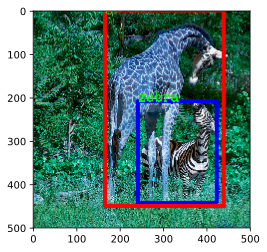

In [73]:
staticImg = img
for result in results:
  
    print(result)
    tl = (result['topleft']['x'],result['topleft']['y'])  
    bl = (result['bottomright']['x'],result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
 
    img = cv2.rectangle(img,tl,bl,(0,0,255),7)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

plt.imshow(img)
plt.show()
 